In [1]:
import pandas as pd
import numpy as np

# load data
data = pd.read_csv("diabetes.csv")

# look at columns
print(data.info())

# split into X and y
y = data['Outcome']
X = data.drop("Outcome", axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


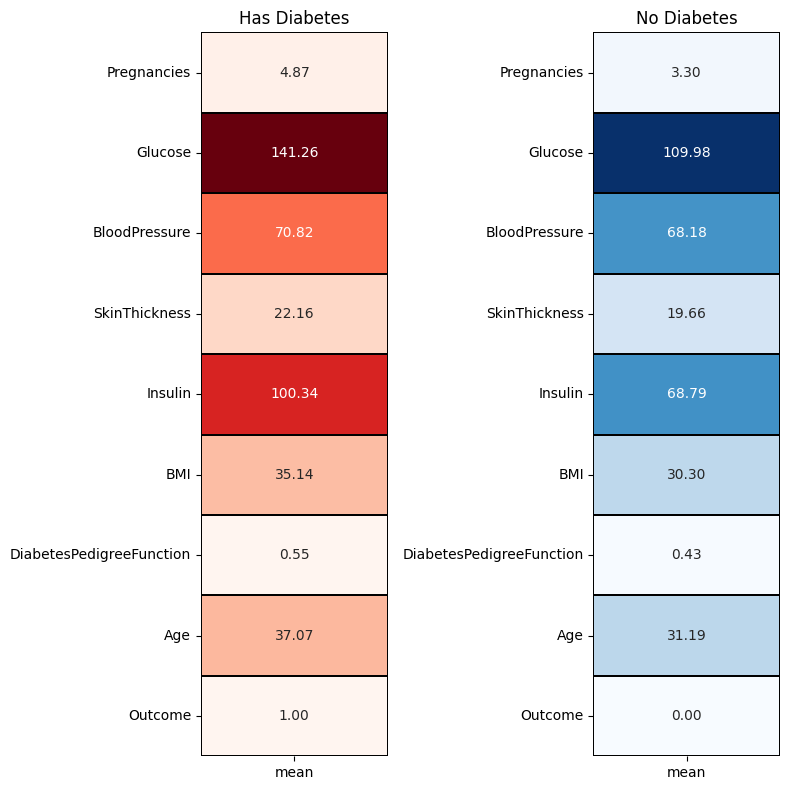

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# get values for the target variables
pos = data[data["Outcome"] == 1].describe().T
neg = data[data["Outcome"] == 0].describe().T

# define graphs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

# has diabetes
sns.heatmap(pos[['mean']], annot=True, cbar=False, fmt='.2f', ax=ax[0], cmap='Reds', linewidths = 1.2, linecolor = 'black')
ax[0].set_title('Has Diabetes')

# no diabetes
sns.heatmap(neg[['mean']], annot=True, cbar=False, fmt='.2f', ax=ax[1], cmap='Blues', linewidths = 1.2, linecolor = 'black')
ax[1].set_title('No Diabetes')

# adjust spacing
fig.tight_layout()
plt.show()


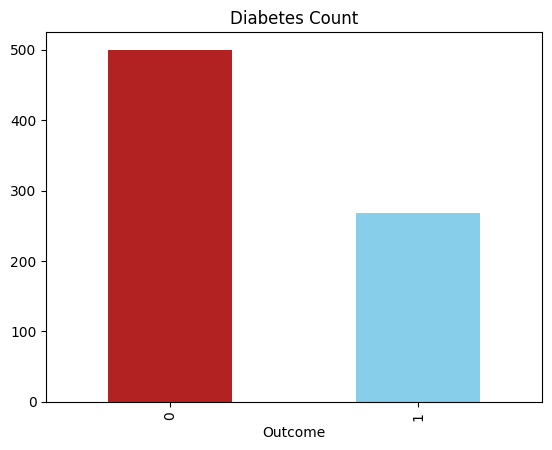

In [3]:
# distribution of Diabetes outcomes
colors = {0: "#87CEEB", 1: "#B22222"}
target = data['Outcome']
colors = ['#B22222', '#87CEEB']
target.value_counts().plot(kind='bar', title='Diabetes Count', color=colors)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaling the data (DONT RUN, MAKES SCORES WORSE)
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

In [4]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# train test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("No rebalance:", sorted(Counter(y_train).items()))

# random under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print("Undersampled:", sorted(Counter(y_train_under).items()))

# random over-sampling
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
print("Oversampled:", sorted(Counter(y_train_over).items()))

No rebalance: [(0, 400), (1, 214)]
Undersampled: [(0, 214), (1, 214)]
Oversampled: [(0, 400), (1, 400)]


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression (no rebalance)
lr = LogisticRegression(random_state=42, solver = "liblinear")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# print results
print("Accuracy:", '{0:.3%}'.format(accuracy))
print("Precision:", '{0:.3%}'.format(precision))
print("Recall:", '{0:.3%}'.format(recall))
print("F1-Score:", '{0:.3%}'.format(f1))
print("AUC:", '{0:.3%}'.format(auc))

Accuracy: 72.727%
Precision: 64.286%
Recall: 50.000%
F1-Score: 56.250%
AUC: 82.870%


In [6]:
# Logistic Regression (under-sample)
lr.fit(X_train_under, y_train_under)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# print results
print("Accuracy:", '{0:.3%}'.format(accuracy))
print("Precision:", '{0:.3%}'.format(precision))
print("Recall:", '{0:.3%}'.format(recall))
print("F1-Score:", '{0:.3%}'.format(f1))
print("AUC:", '{0:.3%}'.format(auc))

Accuracy: 75.325%
Precision: 61.765%
Recall: 77.778%
F1-Score: 68.852%
AUC: 82.389%


In [7]:
# Logistic Regression (over-sample)
lr.fit(X_train_over, y_train_over)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# print results
print("Accuracy:", '{0:.3%}'.format(accuracy))
print("Precision:", '{0:.3%}'.format(precision))
print("Recall:", '{0:.3%}'.format(recall))
print("F1-Score:", '{0:.3%}'.format(f1))
print("AUC:", '{0:.3%}'.format(auc))

Accuracy: 75.974%
Precision: 63.492%
Recall: 74.074%
F1-Score: 68.376%
AUC: 83.000%
